In [1]:
import pandas as pd
import numpy as np
data1 = pd.read_csv("Samples.csv")
data2 = pd.read_csv("heart.csv")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Dataset - 1 : Multidisease

In [3]:
data1.shape

(2313, 25)

In [4]:
data1.Disease.value_counts()

Diabetes    715
Anemia      585
Healthy     451
Thalasse    448
Thromboc    114
Name: Disease, dtype: int64

C:\Users\Varun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Disease', ylabel='count'>

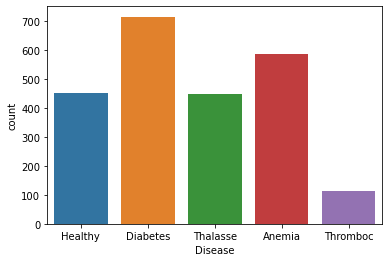

In [5]:
disease_dict = dict(data1.Disease.value_counts())
sns.countplot(data1.Disease)

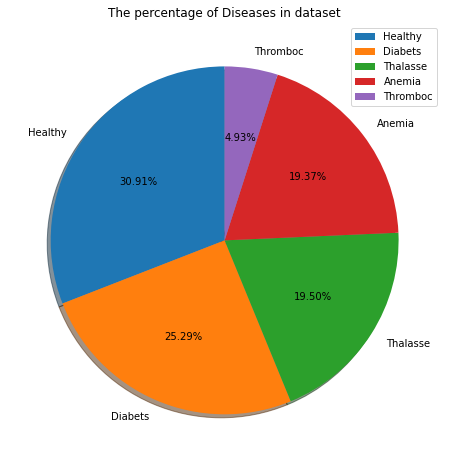

In [6]:
labels = ['Healthy','Diabets','Thalasse','Anemia','Thromboc']
sizes = [data1.Disease.value_counts()[0], data1.Disease.value_counts()[1],data1.Disease.value_counts()[2],data1.Disease.value_counts()[3],data1.Disease.value_counts()[4]]
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.legend(['Healthy','Diabets','Thalasse','Anemia','Thromboc'])
plt.title('The percentage of Diseases in dataset')
plt.show()

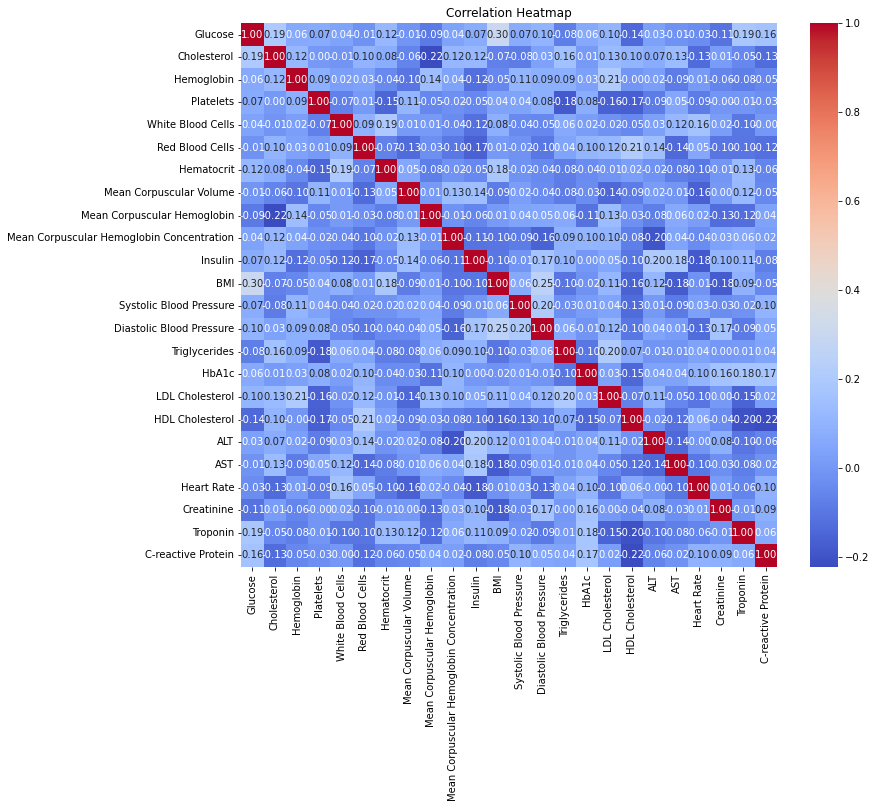

In [7]:
corr_matrix = data1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Dataset - 2 : Heart

In [8]:
data2.shape

(1025, 14)

In [9]:
data2.HeartDisease.value_counts()

Yes    526
No     499
Name: HeartDisease, dtype: int64

C:\Users\Varun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

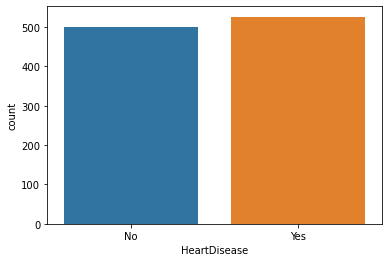

In [10]:
heart_dict = dict(data2.HeartDisease.value_counts())
sns.countplot(data2.HeartDisease)

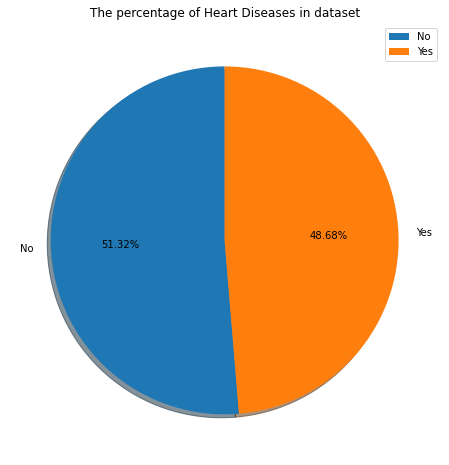

In [11]:
labels = ['No','Yes']
sizes = [data2.HeartDisease.value_counts()[0], data2.HeartDisease.value_counts()[1]]
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.legend(['No','Yes'])
plt.title('The percentage of Heart Diseases in dataset')
plt.show()

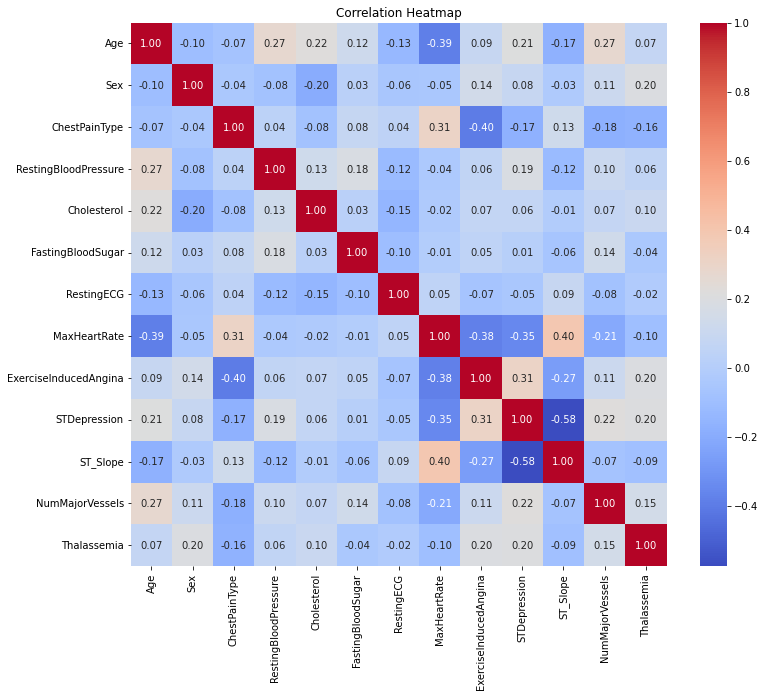

In [12]:
corr_matrix = data2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [13]:
df1 = data1.copy()
df1 = df1.dropna()
X1 = df1.drop(['Disease'], axis=1)
y1 = data1['Disease']
X1 = pd.get_dummies(X1)

In [14]:
df2 = data2.copy()
df2 = df2.dropna()
X2 = df2.drop(['HeartDisease'], axis=1)
y2 = data2['HeartDisease']
X2 = pd.get_dummies(X2)

In [15]:
conclusion1 = {}
conclusion2 = {}

# Building Models

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from collections import Counter
from sklearn import metrics
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [17]:
class Model1:
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print(kernel,"Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        precision_svm = precision_score(self.y_test, predicted_svm, average='weighted')
        recall_svm = recall_score(self.y_test, predicted_svm, average='weighted')
        f1_svm = f1_score(self.y_test, predicted_svm, average='weighted')
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion1['SVM'] = {
            'Accuracy': accuracy_svm,'Precision': precision_svm,'Recall': recall_svm,'F1-score': f1_svm
        }

    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        predicted_rf = RF.predict(self.X_test)
        rf_accuracy = accuracy_score(self.y_test, predicted_rf)
        precision_rf = precision_score(self.y_test, predicted_rf, average='weighted')
        recall_rf = recall_score(self.y_test, predicted_rf, average='weighted')
        f1_rf = f1_score(self.y_test, predicted_rf, average='weighted')
        print(f"Accuracy of RF is : {round(rf_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion1['Random Forest'] = {
            'Accuracy': rf_accuracy,'Precision': precision_rf,'Recall': recall_rf,'F1-score': f1_rf
        }
        
    def NeuralNetwork(self):
        start_time = time.time()
        NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000).fit(self.X_train, self.y_train)
        predicted_nn = NN.predict(self.X_test)
        nn_accuracy = accuracy_score(self.y_test, predicted_nn)
        precision_nn = precision_score(self.y_test, predicted_nn, average='weighted')
        recall_nn = recall_score(self.y_test, predicted_nn, average='weighted')
        f1_nn = f1_score(self.y_test, predicted_nn, average='weighted')
        print(f"Accuracy of Neural Network is : {round(nn_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_nn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion1['Neural Network'] = {
            'Accuracy': nn_accuracy,'Precision': precision_nn,'Recall': recall_nn,'F1-score': f1_nn
        }
        
    def GradientBoosting(self):
        start_time = time.time()
        GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(self.X_train, self.y_train)
        predicted_gbm = GBC.predict(self.X_test)
        gbm_accuracy = accuracy_score(self.y_test, predicted_gbm)
        precision_gbm = precision_score(self.y_test, predicted_gbm, average='weighted')
        recall_gbm = recall_score(self.y_test, predicted_gbm, average='weighted')
        f1_gbm = f1_score(self.y_test, predicted_gbm, average='weighted')
        print(f"Accuracy of Gradient Boosting Machine is : {round(gbm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_gbm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion1['Gradient Boosting'] = {
            'Accuracy': gbm_accuracy,'Precision': precision_gbm,'Recall': recall_gbm,'F1-score': f1_gbm
        }
        
    def HybridModel12(self):
        NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1)
        GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
        
        NN.fit(self.X_train, self.y_train)
        GBC.fit(self.X_train, self.y_train)
        RF.fit(self.X_train, self.y_train)
        
        voting_clf = VotingClassifier(estimators=[('nn', NN), ('gbc', GBC), ('rf', RF)], voting='soft')
        voting_clf.fit(self.X_train, self.y_train)

        hybrid_predictions = voting_clf.predict(self.X_test)
        hybrid_accuracy = accuracy_score(self.y_test, hybrid_predictions)
        precision_hs = precision_score(self.y_test, hybrid_predictions, average='weighted')
        recall_hs = recall_score(self.y_test, hybrid_predictions, average='weighted')
        f1_hs = f1_score(self.y_test, hybrid_predictions, average='weighted')
        print(f"Accuracy of Hybrid Model : {round(hybrid_accuracy*100,2)}%", '\n')
        print(classification_report(hybrid_predictions, self.y_test))
        conclusion1['Model'] = {
            'Accuracy': hybrid_accuracy,'Precision': precision_hs,'Recall': recall_hs,'F1-score': f1_hs
        }
        
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            print(solver,"Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        precision_lr = precision_score(self.y_test, predicted_lr, average='weighted')
        recall_lr = recall_score(self.y_test, predicted_lr, average='weighted')
        f1_lr = f1_score(self.y_test, predicted_lr, average='weighted')
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        conclusion1['Logistic Regression'] = {
            'Accuracy': accuracy_lr,'Precision': precision_lr,'Recall': recall_lr,'F1-score': f1_lr
        }
        
    def AdaBoost(self):
        start_time = time.time()
        ABC = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42).fit(self.X_train, self.y_train)
        predicted_ada = ABC.predict(self.X_test)
        ada_accuracy = accuracy_score(self.y_test, predicted_ada)
        precision_ada = precision_score(self.y_test, predicted_ada, average='weighted')
        recall_ada = recall_score(self.y_test, predicted_ada, average='weighted')
        f1_ada = f1_score(self.y_test, predicted_ada, average='weighted')
        print(f"Accuracy of AdaBoost is : {round(ada_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_ada, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion1['Ada Boost'] = {
            'Accuracy': ada_accuracy,'Precision': precision_ada,'Recall': recall_ada,'F1-score': f1_ada
        }

In [18]:
class Model2:
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print(kernel,"Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        precision_svm = precision_score(self.y_test, predicted_svm, average='weighted')
        recall_svm = recall_score(self.y_test, predicted_svm, average='weighted')
        f1_svm = f1_score(self.y_test, predicted_svm, average='weighted')
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion2['SVM'] = {
            'Accuracy': accuracy_svm,'Precision': precision_svm,'Recall': recall_svm,'F1-score': f1_svm
        }
    
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=42,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        predicted_rf = RF.predict(self.X_test)
        rf_accuracy = accuracy_score(self.y_test, predicted_rf)
        precision_rf = precision_score(self.y_test, predicted_rf, average='weighted')
        recall_rf = recall_score(self.y_test, predicted_rf, average='weighted')
        f1_rf = f1_score(self.y_test, predicted_rf, average='weighted')
        print(f"Accuracy of RF is : {round(rf_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion2['Random Forest'] = {
            'Accuracy': rf_accuracy,'Precision': precision_rf,'Recall': recall_rf,'F1-score': f1_rf
        }
        
    def NeuralNetwork(self):
        start_time = time.time()
        NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200).fit(self.X_train, self.y_train)
        predicted_nn = NN.predict(self.X_test)
        nn_accuracy = accuracy_score(self.y_test, predicted_nn)
        precision_nn = precision_score(self.y_test, predicted_nn, average='weighted')
        recall_nn = recall_score(self.y_test, predicted_nn, average='weighted')
        f1_nn = f1_score(self.y_test, predicted_nn, average='weighted')
        print(f"Accuracy of Neural Network is : {round(nn_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_nn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion2['Neural Network'] = {
            'Accuracy': nn_accuracy,'Precision': precision_nn,'Recall': recall_nn,'F1-score': f1_nn
        }
        
    def GradientBoosting(self):
        start_time = time.time()
        GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(self.X_train, self.y_train)
        predicted_gbm = GBC.predict(self.X_test)
        gbm_accuracy = accuracy_score(self.y_test, predicted_gbm)
        precision_gbm = precision_score(self.y_test, predicted_gbm, average='weighted')
        recall_gbm = recall_score(self.y_test, predicted_gbm, average='weighted')
        f1_gbm = f1_score(self.y_test, predicted_gbm, average='weighted')
        print(f"Accuracy of Gradient Boosting Machine is : {round(gbm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_gbm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion2['Gradient Boosting'] = {
            'Accuracy': gbm_accuracy,'Precision': precision_gbm,'Recall': recall_gbm,'F1-score': f1_gbm
        }
        
    def HybridModel12(self):
        NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=42,
                                     n_jobs=-1)
        GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
        
        NN.fit(self.X_train, self.y_train)
        GBC.fit(self.X_train, self.y_train)
        RF.fit(self.X_train, self.y_train)
        
        voting_clf = VotingClassifier(estimators=[('nn', NN), ('gbc', GBC), ('rf', RF)], voting='soft')
        voting_clf.fit(self.X_train, self.y_train)

        hybrid_predictions = voting_clf.predict(self.X_test)
        hybrid_accuracy = accuracy_score(self.y_test, hybrid_predictions)
        precision_hs = precision_score(self.y_test, hybrid_predictions, average='weighted')
        recall_hs = recall_score(self.y_test, hybrid_predictions, average='weighted')
        f1_hs = f1_score(self.y_test, hybrid_predictions, average='weighted')
        print(f"Accuracy of Hybrid Model : {round(hybrid_accuracy*100,2)}%", '\n')
        print(classification_report(hybrid_predictions, self.y_test))
        conclusion2['Model'] = {
            'Accuracy': hybrid_accuracy,'Precision': precision_hs,'Recall': recall_hs,'F1-score': f1_hs
        }
            
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            print(solver,"Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        precision_lr = precision_score(self.y_test, predicted_lr, average='weighted')
        recall_lr = recall_score(self.y_test, predicted_lr, average='weighted')
        f1_lr = f1_score(self.y_test, predicted_lr, average='weighted')
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        conclusion2['Logistic Regression'] = {
            'Accuracy': accuracy_lr,'Precision': precision_lr,'Recall': recall_lr,'F1-score': f1_lr
        }
        
    def AdaBoost(self):
        start_time = time.time()
        ABC = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42).fit(self.X_train, self.y_train)
        predicted_ada = ABC.predict(self.X_test)
        ada_accuracy = accuracy_score(self.y_test, predicted_ada)
        precision_ada = precision_score(self.y_test, predicted_ada, average='weighted')
        recall_ada = recall_score(self.y_test, predicted_ada, average='weighted')
        f1_ada = f1_score(self.y_test, predicted_ada, average='weighted')
        print(f"Accuracy of AdaBoost is : {round(ada_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_ada, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        conclusion2['Ada Boost'] = {
            'Accuracy': ada_accuracy,'Precision': precision_ada,'Recall': recall_ada,'F1-score': f1_ada
        }

# Implementation of Different Models on Dataset-1

In [20]:
M1.RandomForest()

Accuracy of RF is : 95.82% 

########################################################################
              precision    recall  f1-score   support

      Anemia       0.91      0.99      0.95       319
    Diabetes       0.99      0.90      0.94       488
     Healthy       1.00      1.00      1.00       275
    Thalasse       0.95      0.99      0.97       246
    Thromboc       0.87      1.00      0.93        60

    accuracy                           0.96      1388
   macro avg       0.94      0.97      0.96      1388
weighted avg       0.96      0.96      0.96      1388

########################################################################
--- 0.8228702545166016 seconds ---


In [21]:
M1.SupportVectorMachine()

linear Accuracy: 88.04%
######################################################################
poly Accuracy: 89.99%
######################################################################
rbf Accuracy: 94.67%
######################################################################
sigmoid Accuracy: 62.10%
######################################################################
Accuracy of SVM model 95.0% 

########################################################################
best kernel is :  rbf
########################################################################
              precision    recall  f1-score   support

      Anemia       0.90      0.97      0.94       320
    Diabetes       0.98      0.88      0.93       491
     Healthy       0.99      1.00      0.99       274
    Thalasse       0.92      0.97      0.95       244
    Thromboc       0.86      1.00      0.92        59

    accuracy                           0.95      1388
   macro avg       0.93      0.96      0.95   

In [22]:
M1.GradientBoosting()

Accuracy of Gradient Boosting Machine is : 96.33% 

########################################################################
              precision    recall  f1-score   support

      Anemia       0.97      0.95      0.96       352
    Diabetes       0.95      0.99      0.97       424
     Healthy       1.00      0.98      0.99       279
    Thalasse       0.96      0.95      0.96       262
    Thromboc       0.88      0.86      0.87        71

    accuracy                           0.96      1388
   macro avg       0.95      0.95      0.95      1388
weighted avg       0.96      0.96      0.96      1388

########################################################################
--- 0.940934419631958 seconds ---


In [23]:
M1.NeuralNetwork()

Accuracy of Neural Network is : 92.07% 

########################################################################
              precision    recall  f1-score   support

      Anemia       0.92      0.92      0.92       345
    Diabetes       0.87      0.92      0.90       420
     Healthy       0.99      0.94      0.97       290
    Thalasse       0.94      0.90      0.92       269
    Thromboc       0.88      0.95      0.92        64

    accuracy                           0.92      1388
   macro avg       0.92      0.93      0.92      1388
weighted avg       0.92      0.92      0.92      1388

########################################################################
--- 1.0804977416992188 seconds ---


In [24]:
M1.LogisticRegression()

newton-cg Accuracy: 78.67%
################################################################
lbfgs Accuracy: 78.67%
################################################################
liblinear Accuracy: 81.84%
################################################################
sag Accuracy: 78.67%
################################################################
saga Accuracy: 78.67%
################################################################
Accuracy: 81.84% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

      Anemia       0.92      0.84      0.88       379
    Diabetes       0.80      0.78      0.79       455
     Healthy       0.78      0.82      0.80       262
    Thalasse       0.82      0.84      0.83       251
    Thromboc       0.57      0.95      0.71        41

    accuracy                        

In [25]:
M1.AdaBoost()

Accuracy of AdaBoost is : 72.48% 

########################################################################
              precision    recall  f1-score   support

      Anemia       0.30      0.86      0.45       122
    Diabetes       0.80      0.55      0.65       641
     Healthy       1.00      0.97      0.98       284
    Thalasse       0.81      0.79      0.80       261
    Thromboc       0.97      0.84      0.90        80

    accuracy                           0.72      1388
   macro avg       0.78      0.80      0.76      1388
weighted avg       0.81      0.72      0.74      1388

########################################################################
--- 0.24037861824035645 seconds ---


In [26]:
M1.HybridModel12()

Accuracy of Hybrid Model : 96.4% 

              precision    recall  f1-score   support

      Anemia       0.95      0.95      0.95       343
    Diabetes       0.97      0.96      0.97       449
     Healthy       1.00      0.99      0.99       278
    Thalasse       0.95      0.97      0.96       253
    Thromboc       0.90      0.95      0.93        65

    accuracy                           0.96      1388
   macro avg       0.95      0.96      0.96      1388
weighted avg       0.96      0.96      0.96      1388



# Implementation of Different Models on Dataset-2

In [27]:
M2.RandomForest()

Accuracy of RF is : 95.45% 

########################################################################
              precision    recall  f1-score   support

          No       0.97      0.94      0.96       163
         Yes       0.94      0.97      0.95       145

    accuracy                           0.95       308
   macro avg       0.95      0.96      0.95       308
weighted avg       0.95      0.95      0.95       308

########################################################################
--- 1.0197370052337646 seconds ---


In [28]:
M2.SupportVectorMachine()

linear Accuracy: 80.84%
######################################################################
poly Accuracy: 90.91%
######################################################################
rbf Accuracy: 89.94%
######################################################################
sigmoid Accuracy: 76.62%
######################################################################
Accuracy of SVM model 91.0% 

########################################################################
best kernel is :  poly
########################################################################
              precision    recall  f1-score   support

          No       0.87      0.95      0.91       145
         Yes       0.95      0.87      0.91       163

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

########################################################################
--- 0.15789222717285156 s

In [29]:
M2.GradientBoosting()

Accuracy of Gradient Boosting Machine is : 91.88% 

########################################################################
              precision    recall  f1-score   support

          No       0.92      0.92      0.92       160
         Yes       0.91      0.92      0.92       148

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

########################################################################
--- 0.0570521354675293 seconds ---


In [30]:
M2.NeuralNetwork()

Accuracy of Neural Network is : 93.83% 

########################################################################
              precision    recall  f1-score   support

          No       0.94      0.94      0.94       158
         Yes       0.94      0.93      0.94       150

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308

########################################################################
--- 0.9827911853790283 seconds ---


C:\Users\Varun\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
M2.LogisticRegression()

newton-cg Accuracy: 79.55%
################################################################
lbfgs Accuracy: 79.55%
################################################################
liblinear Accuracy: 79.55%
################################################################
sag Accuracy: 79.55%
################################################################
saga Accuracy: 79.55%
################################################################
Accuracy: 79.55% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

          No       0.72      0.86      0.78       134
         Yes       0.87      0.75      0.80       174

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.79       308
weighted avg       0.81      0.80      0.80       308
 

#################################

In [32]:
M2.AdaBoost()

Accuracy of AdaBoost is : 81.49% 

########################################################################
              precision    recall  f1-score   support

          No       0.75      0.88      0.81       136
         Yes       0.89      0.77      0.82       172

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.83      0.81      0.82       308

########################################################################
--- 0.14988946914672852 seconds ---


In [33]:
M2.HybridModel12()

Accuracy of Hybrid Model : 96.75% 

              precision    recall  f1-score   support

          No       0.97      0.96      0.97       161
         Yes       0.96      0.97      0.97       147

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



# Analysis and Comparison

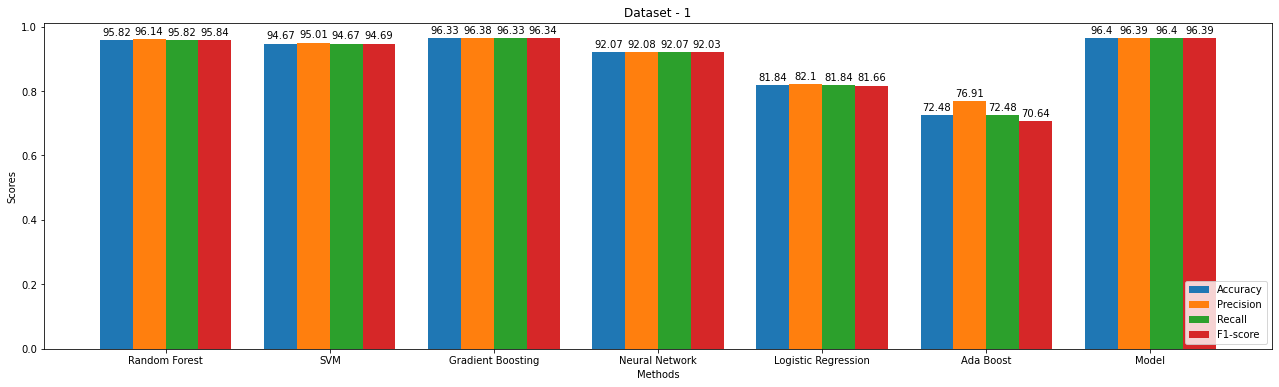

In [34]:
labels = list(conclusion1.keys())
accuracy = [conclusion1[name]['Accuracy'] for name in labels]
precision = [conclusion1[name]['Precision'] for name in labels]
recall = [conclusion1[name]['Recall'] for name in labels]
f1 = [conclusion1[name]['F1-score'] for name in labels]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(22, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_xlabel('Methods')
ax.set_title('Dataset - 1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height*100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

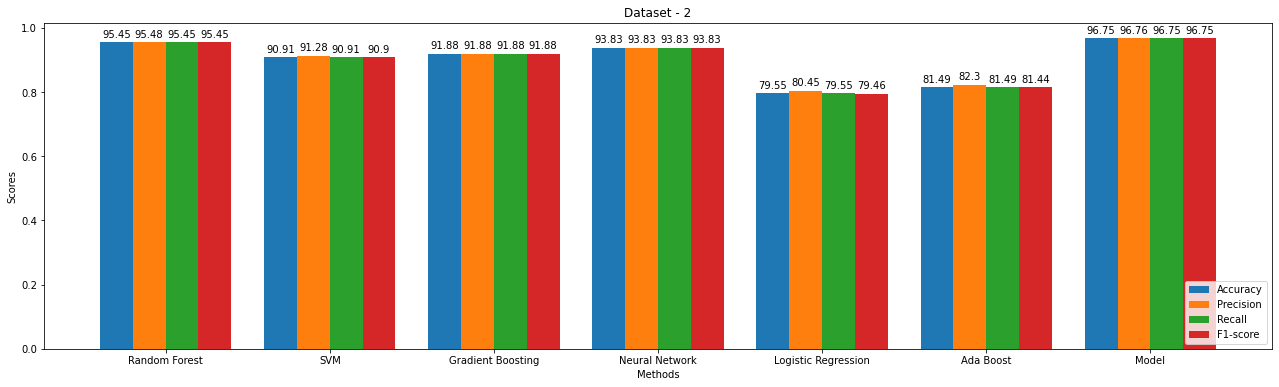

In [35]:
labels = list(conclusion2.keys())
accuracy = [conclusion2[name]['Accuracy'] for name in labels]
precision = [conclusion2[name]['Precision'] for name in labels]
recall = [conclusion2[name]['Recall'] for name in labels]
f1 = [conclusion2[name]['F1-score'] for name in labels]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(22, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_xlabel('Methods')
ax.set_title('Dataset - 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height*100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()